In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
VIB = VIB[['Close']]
VIB

,Close
Time,
2017-06-02,3320
2017-06-05,3290
2017-06-06,3320
2017-06-07,3340
2017-06-08,3310
...,...
2023-12-11,19200
2023-12-12,19200
2023-12-13,19050


In [5]:
VIB['Target'] = VIB.Close.shift(-1)
VIB.dropna(inplace = True)
VIB.head()

,Close,Target
Time,,
2017-06-02,3320,3290.0
2017-06-05,3290,3320.0
2017-06-06,3320,3340.0
2017-06-07,3340,3310.0
2017-06-08,3310,3290.0


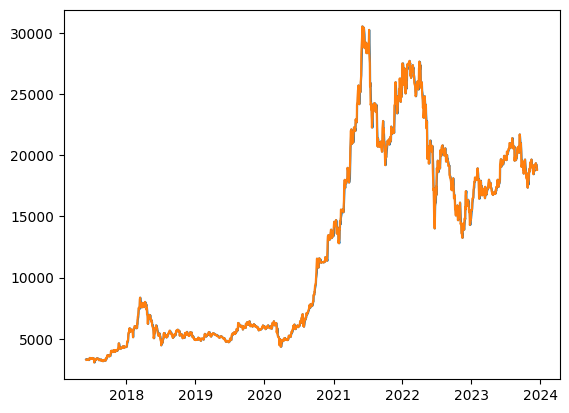

In [6]:
X = VIB[['Close']]
y = VIB[['Target']]

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.8 * len(VIB))
test_size = len(VIB) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)

In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)

RBF MAPE: 1.4529426122551787
RBF MAE:  252.8008099778295
RBF Testing RMSE: Target    346.718819
dtype: float64
RBF MSLE:  0.0004080891977293922
Poly MAPE: 13.601659449476422
Poly MAE: 2375.713107411289
Poly Testing RMSE: Target    2437.121382
dtype: float64
Poly MSLE:  0.02394526421349969


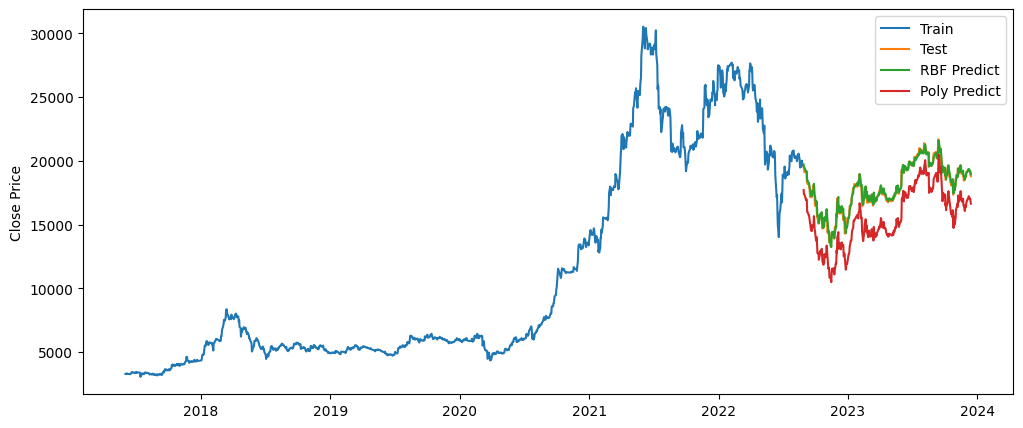

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = VIB.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[18900]])

In [14]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([18947.77575197]), array([18993.0425549]), array([19035.89299038]), array([19076.42224895]), array([19114.72696969]), array([19150.90424319]), array([19185.05076669]), array([19217.26213873]), array([19247.63227964]), array([19276.2529642]), array([19303.21345303]), array([19328.60021008]), array([19352.49669424]), array([19374.98321434]), array([19396.13683774]), array([19416.03134371]), array([19434.7372141]), array([19452.32165431]), array([19468.84863896]), array([19484.37897707]), array([19498.97039266]), array([19512.67761689]), array([19525.55248883]), array([19537.64406233]), array([19548.99871672]), array([19559.66026963]), array([19569.67009061]), array([19579.06721422]), array([19587.88845173]), array([19596.16850072]), array([19603.940052]), array([19611.23389333]), array([19618.07900978]), array([19624.50268035]), array([19630.53057082]), array([19636.18682268]), array([19641.49413811]), array([19646.47386111]), array([19651.14605473]), 

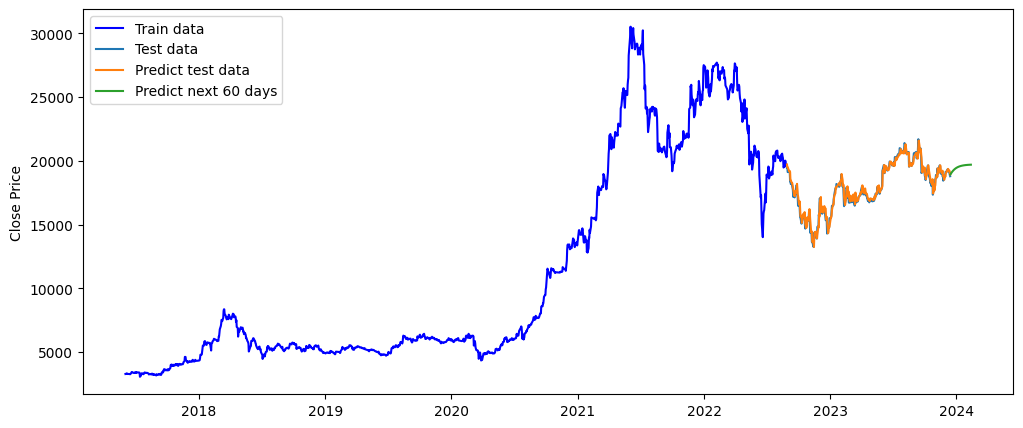

In [16]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred_rbf, label='Predict test data')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')

plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()

